## Logistic Regression
Breast Cancer data from [the UCI repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) contains records corresponding to 
cases of observed tumors.   There are a number of observations for each and a categorisation in the `class` column: 2 for benign (good), 4 for malignant (bad).  Your task is to build a logistic regression model to classify these cases. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [2]:
bcancer = pd.read_csv("Data/breast-cancer-wisconsin.csv", na_values="?")
bcancer.head()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [3]:
# Examine the data: check number of rows and number of columns
bcancer.shape

(699, 11)

In [4]:
# Look at the statistical summary of the dataframe
bcancer.describe()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
# Check how many classes we do have from the "class" column
set(bcancer['class'])

{2, 4}

In [6]:
# Check number of samples for each class and comment whether dataset is balanced?
bcancer.groupby('class').size()

class
2    458
4    241
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

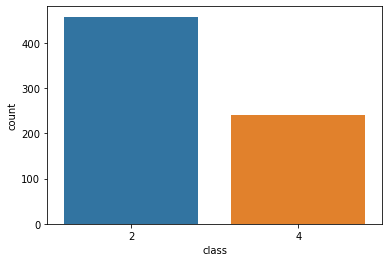

In [7]:
sns.countplot(x = bcancer['class'], label = 'Count')

The data set is not balanced for classes as there are more class 2 then class 4. 

In [8]:
# Deal with the NaN values in the data
bcancer.isna().sum()

sample_code_number              0
clump_thickness                 0
uniformity_cell_size            0
uniformity_cell_shape           0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

In [9]:
bcancer = bcancer.dropna()
bcancer.shape

(683, 11)

In [10]:
# Split your data into training(80%) and testing data (20%) and use random_state=142
# stratify will ensure that both classes are represented in proportion within the test and training samples. This is important for unbalanced tests.
train, test = train_test_split(bcancer, test_size = 0.2, stratify=bcancer['class'], random_state = 142)
print(train.shape)
print(test.shape)

(546, 11)
(137, 11)


In [11]:
X_train = train.drop(['class', 'sample_code_number'], axis = 1)
y_train = train['class']
X_test = test.drop(['class', 'sample_code_number'], axis = 1)
y_test = test['class']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(546, 9)
(546,)
(137, 9)
(137,)


In [12]:
# Build your Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# making predictions on training set
y_hat_train = model.predict(X_train)

In [14]:
# Do predictions on test set
y_hat_test = model.predict(X_test)

### Model Evaluation

In [15]:
# Evaluate the performance of your trained model
print(f'Acc on training set: {accuracy_score(y_train,y_hat_train)}')
print(f'Acc on test set: {accuracy_score(y_test,y_hat_test)}')

Acc on training set: 0.967032967032967
Acc on test set: 0.9708029197080292


In [16]:
# Checking confusion matrix
print('Confusion matrix on test set:  ')
print(confusion_matrix(y_test, y_hat_test))

Confusion matrix on test set:  
[[89  0]
 [ 4 44]]


### Feature Selection

In [17]:
# creating RFE object
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [18]:
y_test_hat = rfe.predict(X_test)
print(f'Acc on test set: {accuracy_score(y_test,y_hat_test)}')

Acc on test set: 0.9708029197080292


In [19]:
for i in range(X_train.shape[1]):
    print(f'column: {i}, Selected: {rfe.support_[i]}, Rank: {rfe.ranking_[i]}')

column: 0, Selected: True, Rank: 1
column: 1, Selected: False, Rank: 5
column: 2, Selected: True, Rank: 1
column: 3, Selected: False, Rank: 2
column: 4, Selected: False, Rank: 4
column: 5, Selected: True, Rank: 1
column: 6, Selected: True, Rank: 1
column: 7, Selected: False, Rank: 3
column: 8, Selected: True, Rank: 1


In [23]:
# to increment number of features, one at each time
acc_scores = []
for i in range(1,10):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.8905109489051095
Acc on test set using 2 features:  0.9416058394160584
Acc on test set using 3 features:  0.9416058394160584
Acc on test set using 4 features:  0.9562043795620438
Acc on test set using 5 features:  0.9708029197080292
Acc on test set using 6 features:  0.9635036496350365
Acc on test set using 7 features:  0.9708029197080292
Acc on test set using 8 features:  0.9708029197080292
Acc on test set using 9 features:  0.9708029197080292


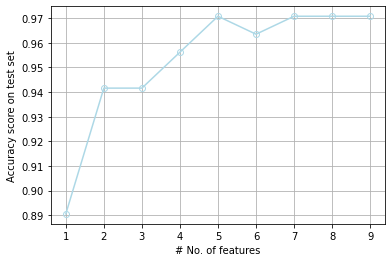

In [27]:
plt.grid()   
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 10), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,
         markeredgecolor = 'lightblue', markerfacecolor = 'None')

## Conclusion

The initial model, using the 9 variables, correctly classified 97% of the test sample data as either benign or malignent tumors. 
The confusion matrix for the model showed 80 correct and zero incorrect classified benign tumors. The model showed 44 correctly classified malignent tumors and 4 incorrectly classified as benign.

Upon the application of the recursive feature estimation function, it was found that the inclusion of 5, 7, 8 or 9 variables produced the highest accuracy score. As it often requires additional resources to collect un-needed information, the model with 5 variables would be best to proceed with. 
The model includes the variables, 'clump_thickness', 'uniformity_cell_shape', 'bare_nuclei', 'bland_chromatin', 'mitoses'.

For a clinical diagnosis setting, the wrong diagnosis of a benign as a malignent would be unfortunate for the patient however not as serious as a wrong diagnosis of a malignent tumor as begnin which may result in death. The model should be developed to reduce the number of malignent false negatives.. 